<a href="https://colab.research.google.com/github/KunalParkhade/eCommerce-Zeotap/blob/main/Kunal_Parkhade_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Data
customers = pd.read_csv("/content/drive/MyDrive/ZeoTap/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/ZeoTap/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ZeoTap/Transactions.csv")

# Basic Data Exploration
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [5]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [6]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [7]:
# Merging Datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [8]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


# EDA

Customer Count by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


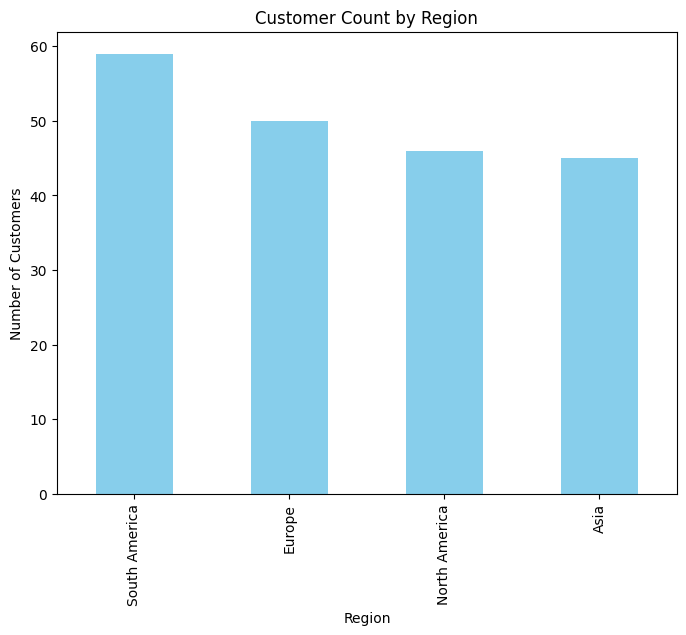

In [15]:
# 1. Customer Demographics
region_counts = customers['Region'].value_counts()
print("Customer Count by Region:")
print(region_counts)
region_counts.plot(kind='bar', title='Customer Count by Region', figsize=(8, 6), color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

Signup Trends Over Time:
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


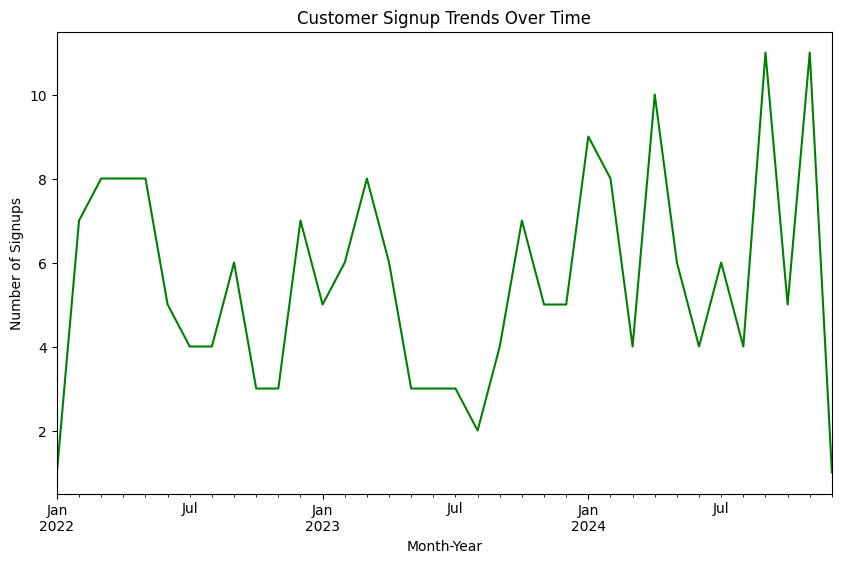

In [16]:
# 2. Customer signup trends
signup_trends = pd.to_datetime(customers['SignupDate']).dt.to_period('M').value_counts().sort_index()
print("Signup Trends Over Time:")
print(signup_trends)
signup_trends.plot(kind='line', title='Customer Signup Trends Over Time', figsize=(10, 6), color='green')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')
plt.show()

Top 10 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


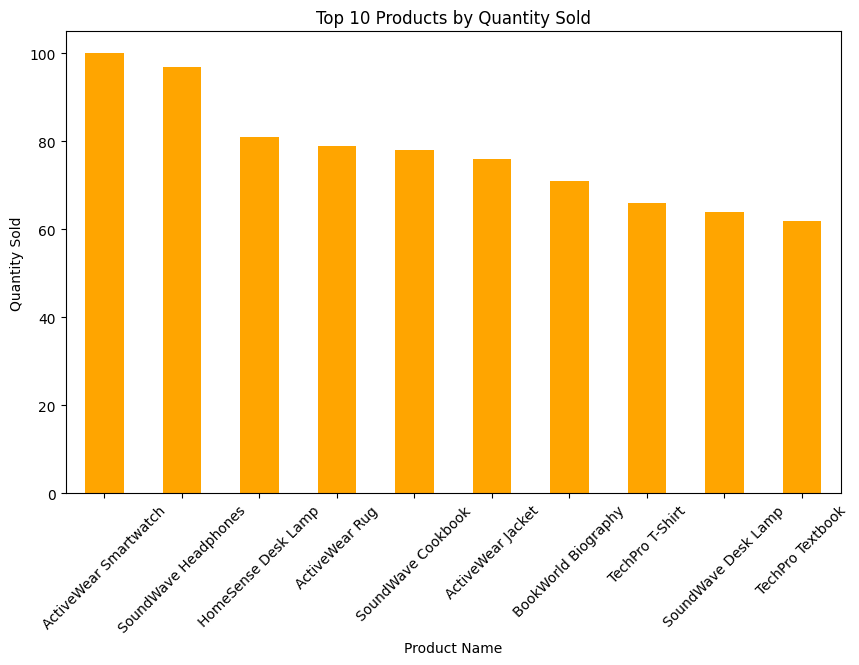

In [18]:
# 3. Product Popularity
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(top_products)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold', figsize=(10, 6), color='orange')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

Sales by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


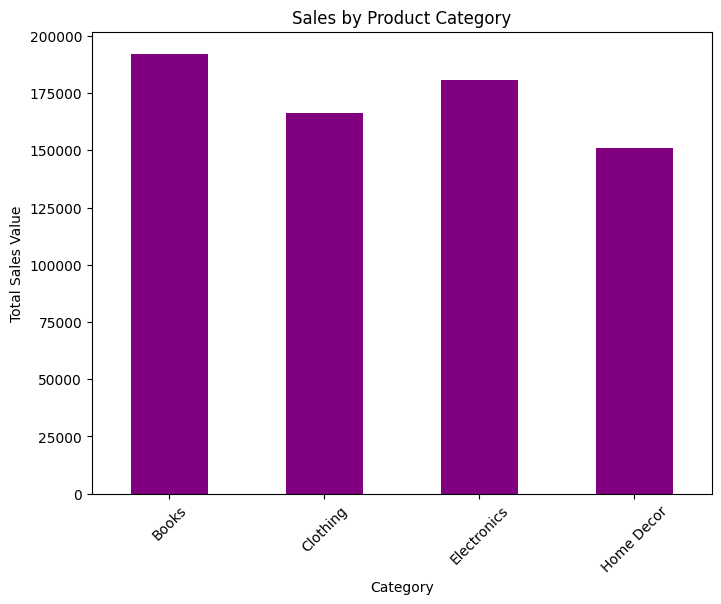

In [19]:
# 4. Popular product categories
category_sales = merged_data.groupby('Category')['TotalValue'].sum()
print("Sales by Product Category:")
print(category_sales)
category_sales.plot(kind='bar', title='Sales by Product Category', figsize=(8, 6), color='purple')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

Monthly Sales Trends:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


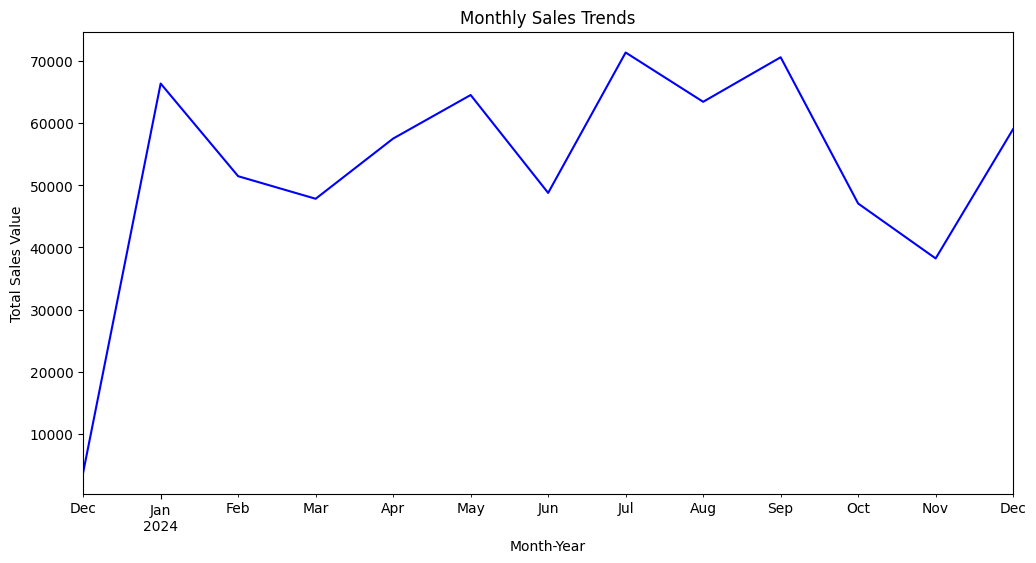

In [20]:
# 5. Sales trends over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly Sales Trends:")
print(monthly_sales)
monthly_sales.plot(kind='line', title='Monthly Sales Trends', figsize=(12, 6), color='blue')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.show()

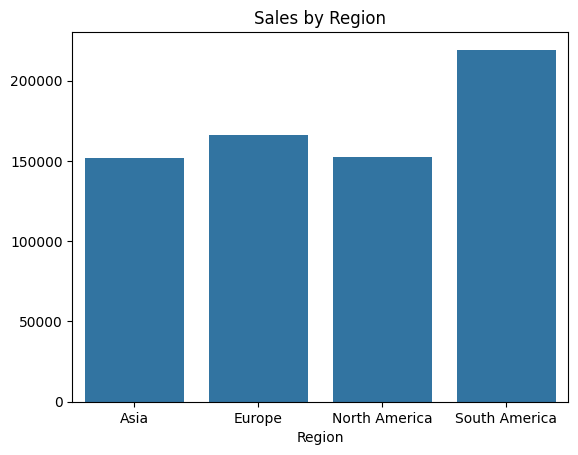

In [12]:
# 6. Regional sales distribution
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.show()

Repeat Customers: 187, New Customers: 12


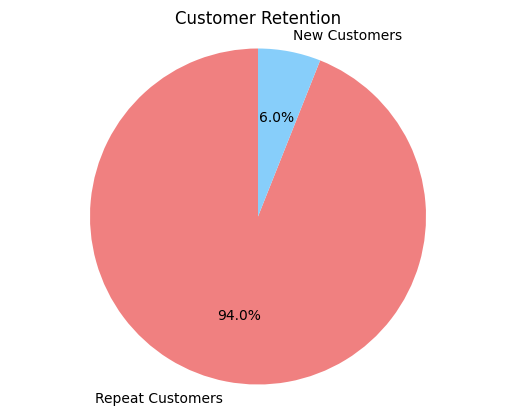

In [21]:
# 7. Customer Retention
customer_transactions = merged_data.groupby('CustomerID').size()
repeat_customers = customer_transactions[customer_transactions > 1].count()
new_customers = customer_transactions[customer_transactions == 1].count()
print(f"Repeat Customers: {repeat_customers}, New Customers: {new_customers}")
labels = ['Repeat Customers', 'New Customers']
sizes = [repeat_customers, new_customers]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Customer Retention')
plt.axis('equal')
plt.show()

Average Transaction Value by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


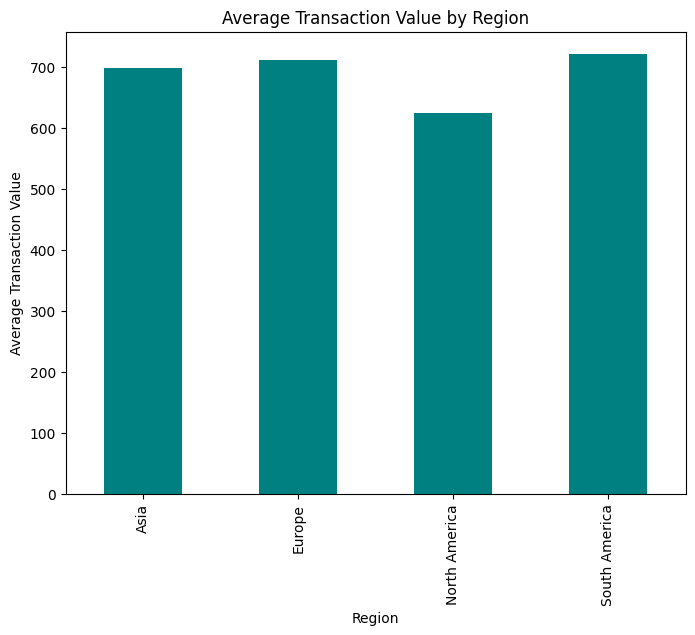

In [22]:
# 8. Average Transaction Value
avg_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean()
avg_transaction_by_region = merged_data.groupby('Region')['TotalValue'].mean()
print("Average Transaction Value by Region:")
print(avg_transaction_by_region)
avg_transaction_by_region.plot(kind='bar', title='Average Transaction Value by Region', figsize=(8, 6), color='teal')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value')
plt.show()

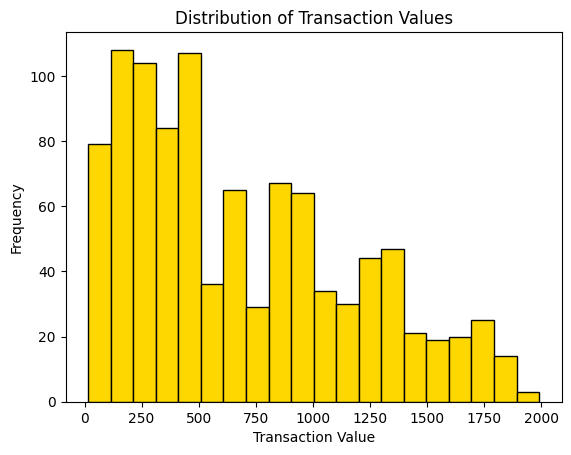

In [23]:
plt.hist(merged_data['TotalValue'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()